In [1]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import json
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords

New cached course

In [27]:
atlas_cached_course = pd.read_csv('Atlas_course_cachedcourse.csv')
atlas_cached_course = atlas_cached_course[['course', 'search']]
atlas_cached_course = atlas_cached_course.rename(columns={'search': 'description'})
atlas_cached_course

,course,description
0,AAS 103,In recent years the news coverage of Africa ha...
1,AAS 104,Hum Seminar
2,AAS 111,Africa is the second largest continent on eart...
3,AAS 115,This course is an introduction to spoken and w...
4,AAS 116,This introductory-level course is designed for...
...,...,...
13201,YIDDISH 431,This is the first of a two-term sequence desig...
13202,YIDDISH 432,This is the second of a two-term sequence desi...
13203,YIDDISH 531,This is the third term of a language sequence ...
13204,YIDDISH 532,This is the fourth term of a language sequence...


In [ ]:
atlas_cached_course.to_csv('gpt_file_L.csv', index=False)

Atlas_coursebestdesc

In [7]:
best_desc = pd.read_csv('data/atlas_course_bestdescription.csv', header=0)
sec_desc = pd.read_csv('data/atlas_course_sectiondescription.csv', header=0)

In [8]:
extras = pd.merge(best_desc, sec_desc, left_on='best_section_id', right_on='id', how='left')

In [9]:
extras = extras[['course_code_spaced_x', 'description']]

In [10]:
from bs4 import BeautifulSoup

def extract_text(html_str):
    soup = BeautifulSoup(html_str, 'html.parser')
    return soup.get_text()

extras['description'] = extras['description'].apply(extract_text)

In [11]:
extras = extras.rename(columns={'course_code_spaced_x': 'course'})

In [22]:
extras.to_csv('extras.csv', index=False)

In [49]:
ctf = 'MATH 215'
course_description = extras.query("course == @ctf")['description'].values[0]
print(course_description)

Background and Goals: The sequence Math 115-116-215 is the standard complete introduction to the concepts and methods of calculus. It is taken by the majority of students intending to concentrate in mathematics, science, or engineering as well as students heading for many other fields. The emphasis is on concepts and solving problems rather than theory and proof.

 For more information on this course, please visit the Department of Mathematics webpage Class Format:Asynchronous mini-lecture videos and synchronous group work during class time.  Class is live and students are expected to attend at the scheduled times.   Labs are live and students are expected to attend at the scheduled times.

This course will be completely online, however, students may elect to attend in person tutorials for additional instruction.  More information on the tutorials will be available from your instructor on the first day of classes.


In [50]:
course_description = df.query("course == @ctf")['description'].values[0]
print(course_description)

Background and Goals: The sequence Math 115-116-215 is the standard complete introduction to the concepts and methods of calculus. It is taken by the majority of students intending to concentrate in mathematics, science, or engineering as well as students heading for many other fields. The emphasis is on concepts and solving problems rather than theory and proof.   For more information on this course, please visit the Department of Mathematics webpage


In [13]:
B = pd.read_csv('gpt_file_L.csv')
A = pd.read_csv('extras.csv')

In [23]:
C=pd.read_csv('nice_courses.csv')

In [21]:
B

,course,description
0,AAS 103,In recent years the news coverage of Africa ha...
1,AAS 104,Hum Seminar
2,AAS 111,Africa is the second largest continent on eart...
3,AAS 115,This course is an introduction to spoken and w...
4,AAS 116,This introductory-level course is designed for...
...,...,...
13201,YIDDISH 431,This is the first of a two-term sequence desig...
13202,YIDDISH 432,This is the second of a two-term sequence desi...
13203,YIDDISH 531,This is the third term of a language sequence ...
13204,YIDDISH 532,This is the fourth term of a language sequence...


In [26]:
courses_in_A = A['course'].unique()  # Get unique courses in df_A
courses_in_B = B['course'].unique()  # Get unique courses in df_B

courses_not_in_B = courses_in_A[~np.isin(courses_in_A, courses_in_B)]
len(courses_not_in_B)

188

In [16]:
unique = A[A['course'].isin(courses_not_in_B)]
master = pd.concat([B, unique], ignore_index=True)

In [37]:
C = C.drop(columns=['department', 'level', 'school'])

In [40]:
C

,course,description
0,AAS 103,In recent years the news coverage of Africa ha...
1,AAS 104,Hum Seminar
2,AAS 111,Africa is the second largest continent on eart...
3,AAS 115,This course is an introduction to spoken and w...
4,AAS 116,This introductory-level course is designed for...
...,...,...
14274,YIDDISH 431,This is the first of a two-term sequence desig...
14275,YIDDISH 432,This is the second of a two-term sequence desi...
14276,YIDDISH 531,This is the third term of a language sequence ...
14277,YIDDISH 532,This is the fourth term of a language sequence...


In [41]:
everything = pd.concat([C, unique], ignore_index=True)

In [43]:
everything.to_csv('hybrid_course_data.csv', index=False)

In [17]:
unique

,course,description
70,EECS 532,"Theory, systems and applications of active and..."
119,EECS 540,Introduction to nonrelativistic quantum mechan...
270,EECS 560,"Linear spaces and linear operators. Bases, sub..."
357,PHIL 232,Phil 232 will provide an introduction to found...
602,QMSS 251,Due to the growth in electronic sources such a...
...,...,...
3941,POLSCI 816,This course provides an introduction to estima...
3958,PSYCH 841,Functional MRI has become one of the leading m...
4007,SW 858,This course is concerned with analyzing the di...
4009,SW 874,This seminar provides a foundation and overvie...


In [19]:
master.head(-5)

,course,description
0,AAS 103,In recent years the news coverage of Africa ha...
1,AAS 104,Hum Seminar
2,AAS 111,Africa is the second largest continent on eart...
3,AAS 115,This course is an introduction to spoken and w...
4,AAS 116,This introductory-level course is designed for...
...,...,...
13384,PHIL 551,"In this seminar, we will explore the relation ..."
13385,PHIL 677,This seminar will examine the content and basi...
13386,POLSCI 666,This course examines political explanations fo...
13387,POLSCI 793,The process of sense making relates new inform...


In [13]:
len(courses_not_in_B)

188

Atlas_cachedcourse

In [10]:
#~16 seconds to run
df = pd.read_csv(r"C:\Users\hvand\OneDrive - Umich\Documents\atlas\Data\atlas_course_cachedcourse.csv")
tqdm.pandas()
df = df.join(df.data.apply(lambda x: json.loads(x)).progress_apply(pd.Series), rsuffix='_data')
df = df.drop('data',axis=1)
df.columns

100%|██████████| 12629/12629 [00:05<00:00, 2148.47it/s]


Index(['course', 'title', 'search', 'course_number', 'title_data', 'key',
       'code', 'description', 'advisory_prerequisites', 'credits',
       'cross_listed_courses', 'all_courses', 'associated_courses',
       'associated_courses_unique', 'all_associated_courses',
       'all_associated_courses_unique', 'historical_enrollment_total',
       'totalenrollment', 'commonly_taken_after', 'commonly_taken_with',
       'commonly_taken_before', 'average_enrollment', 'common_majors',
       'common_majors_n', 'subject', 'units_minimum', 'units_maximum',
       'incomplete', 'enforced_prerequisites'],
      dtype='object')

In [11]:
df = df[['course', 'description']]

In [12]:
df

,course,description
0,AAS 103,In recent years the news coverage of Africa ha...
1,AAS 104,Hum Seminar
2,AAS 111,Africa is the second largest continent on eart...
3,AAS 115,This course is an introduction to spoken and w...
4,AAS 116,This introductory-level course is designed for...
...,...,...
12624,YIDDISH 431,This is the first of a two-term sequence desig...
12625,YIDDISH 432,This is the second of a two-term sequence desi...
12626,YIDDISH 531,This is the third term of a language sequence ...
12627,YIDDISH 532,This is the fourth term of a language sequence...


In [23]:
df.to_csv('gpt_file_L.csv', index=False)

In [3]:
def count_words(s):
    return len(s.split())

In [4]:
search_wc = df['search'].apply(count_words)
desciption_wc = df['description'].apply(count_words)

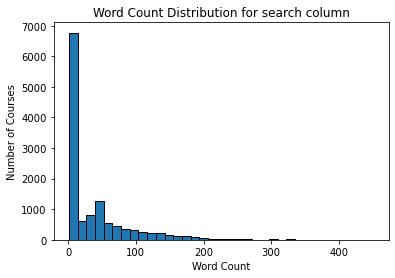

In [5]:
search_wc.hist(bins=35, edgecolor='black')
plt.title('Word Count Distribution for search column')
plt.xlabel('Word Count')
plt.ylabel('Number of Courses')
plt.grid(False)
plt.show()


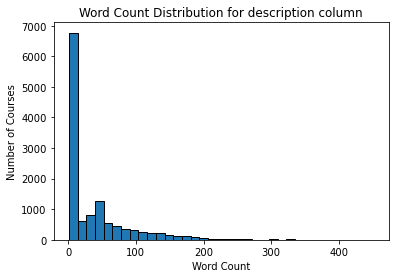

In [6]:
desciption_wc.hist(bins=35, edgecolor='black')
plt.title('Word Count Distribution for description column')
plt.xlabel('Word Count')
plt.ylabel('Number of Courses')
plt.grid(False)
plt.show()

In [32]:
count = (desciption_wc < 5).sum()
count

6170

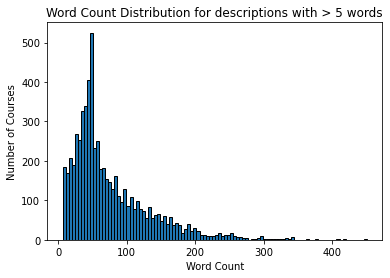

In [55]:
wc_g5 = desciption_wc[desciption_wc>5]
wc_g5.hist(bins=100, edgecolor='black')
plt.title('Word Count Distribution for descriptions with > 5 words')
plt.xlabel('Word Count')
plt.ylabel('Number of Courses')
plt.grid(False)
plt.show()

In [43]:
6170/12629

0.48855808060812417

In [53]:
wc_30t50 = desciption_wc[desciption_wc>4] & desciption_wc[desciption_wc<50]
wc_30t50.sum()/(12629-6170)

0.46168137482582444

In [40]:
df["word_count"] = df['description'].apply(lambda x: len(x.split()))

C:\Users\hvand\AppData\Local\Temp\ipykernel_5168\1581883711.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["word_count"] = df['description'].apply(lambda x: len(x.split()))


In [42]:
word_count_table = df.groupby('word_count').size().reset_index(name='count_entries')

In [43]:
word_count_table

,word_count,count_entries
0,1,848
1,2,1973
2,3,2188
3,4,1161
4,5,279
...,...,...
282,363,1
283,376,3
284,408,2
285,419,1


In [61]:
#list where each word count appears as many times as its frequency.
repeated_word_counts = word_count_table.apply(lambda row: [row['word_count']] * row['count_entries'], axis=1).explode().tolist()
mean_count = np.mean(repeated_word_counts)
median_count = np.median(repeated_word_counts)
std_dev_count = np.std(repeated_word_counts)
min_count = np.min(repeated_word_counts)
max_count = np.max(repeated_word_counts)

print(f"Mean Word Count: {mean_count}")
print(f"Median Word Count: {median_count}")
print(f"Standard Deviation: {std_dev_count}")
print(f"Minimum Word Count: {min_count}")
print(f"Maximum Word Count: {max_count}")

Q1 = np.percentile(repeated_word_counts, 25)
Q2 = np.percentile(repeated_word_counts, 50) 
Q3 = np.percentile(repeated_word_counts, 75)
Q4 = np.percentile(repeated_word_counts, 100) 

print(f"1st Quartile (Q1): {Q1}")
print(f"2nd Quartile (Q2/Median): {Q2}")
print(f"3rd Quartile (Q3): {Q3}")
print(f"4th Quartile (Q4/Max): {Q4}")

Mean Word Count: 37.96563465040779
Median Word Count: 5.0
Standard Deviation: 54.075489919001825
Minimum Word Count: 1
Maximum Word Count: 451
1st Quartile (Q1): 3.0
2nd Quartile (Q2/Median): 5.0
3rd Quartile (Q3): 52.0
4th Quartile (Q4/Max): 451.0


In [67]:
word_count_table_filtered = word_count_table[4:]
repeated_word_counts = word_count_table_filtered.apply(lambda row: [row['word_count']] * row['count_entries'], axis=1).explode().tolist()
mean_count = np.mean(repeated_word_counts)
median_count = np.median(repeated_word_counts)
std_dev_count = np.std(repeated_word_counts)
min_count = np.min(repeated_word_counts)
max_count = np.max(repeated_word_counts)

print(f"Mean Word Count: {mean_count}")
print(f"Median Word Count: {median_count}")
print(f"Standard Deviation: {std_dev_count}")
print(f"Minimum Word Count: {min_count}")
print(f"Maximum Word Count: {max_count}")

Q1 = np.percentile(repeated_word_counts, 25)
Q2 = np.percentile(repeated_word_counts, 50) 
Q3 = np.percentile(repeated_word_counts, 75)
Q4 = np.percentile(repeated_word_counts, 100) 

print(f"1st Quartile (Q1): {Q1}")
print(f"2nd Quartile (Q2/Median): {Q2}")
print(f"3rd Quartile (Q3): {Q3}")
print(f"4th Quartile (Q4/Max): {Q4}")

Mean Word Count: 71.75507044434123
Median Word Count: 51.0
Standard Deviation: 58.135160942667405
Minimum Word Count: 5
Maximum Word Count: 451
1st Quartile (Q1): 33.0
2nd Quartile (Q2/Median): 51.0
3rd Quartile (Q3): 96.0
4th Quartile (Q4/Max): 451.0


### Exploration of course_navigationinfo and coursetermproperties

In [4]:
nav = pd.read_csv(r"C:\Users\hvand\OneDrive - Umich\Documents\atlas\Data\atlas_course_coursenavigationinfo.csv")
prop = pd.read_csv(r"C:\Users\hvand\OneDrive - Umich\Documents\atlas\Data\atlas_course_coursetermproperties.csv")
desc = pd.read_csv(r"C:\Users\hvand\OneDrive - Umich\Documents\atlas\Data\atlas_course_bestdescription.csv")
sec_desc = pd.read_csv(r"C:\Users\hvand\OneDrive - Umich\Documents\atlas\Data\atlas_course_sectiondescription.csv")

In [14]:
sec_desc.head(10)

,id,created,modified,course_code_spaced,term,section,description,source
0,10321,2021-04-20 22:37:07.649023,2021-04-20 22:37:07.649076,ECON 101,2320,100,<p>This course introduces fundamental microeco...,lsa_api
1,10322,2021-04-20 22:37:07.957963,2021-04-20 22:37:07.958013,ECON 101,2320,200,<p>ECON 101 is designed to help students under...,lsa_api
2,10323,2021-04-20 22:37:08.265753,2021-04-20 22:37:08.265824,ECON 101,2320,300,<p>This is an introductory economics course. I...,lsa_api
3,10324,2021-04-20 22:37:08.557043,2021-04-20 22:37:08.557095,ECON 101,2320,400,<p>This course introduces microeconomic concep...,lsa_api
4,10325,2021-04-20 22:37:08.845802,2021-04-20 22:37:08.845852,ECON 101,2320,500,<p>This course introduces microeconomic concep...,lsa_api
5,10326,2021-04-20 22:37:32.553336,2021-04-20 22:37:32.553388,ECON 101,2360,500,<p>ECON 101 is designed to help students under...,lsa_api
6,10327,2021-04-20 22:37:33.577098,2021-04-20 22:37:33.577149,ECON 101,2360,300,<p>This is an introductory economics course. I...,lsa_api
7,10328,2021-04-20 22:37:33.612769,2021-04-20 22:37:33.612817,ECON 101,2360,400,<p>This course introduces microeconomic concep...,lsa_api
8,10329,2021-04-20 22:37:34.154300,2021-04-20 22:37:34.154349,ECON 101,2360,200,<p>This is an introductory economics course. I...,lsa_api
9,10330,2021-04-20 22:37:34.878937,2021-04-20 22:37:34.878985,ECON 101,2360,100,<p>This course introduces fundamental microeco...,lsa_api


In [13]:
nav.shape

(13574, 6)

In [6]:
prop.head(10)

,id,course_id,term,title,description,course_info_id
0,1,1349,2460,Diss-Precand,Diss-Precand,3
1,2,1350,2460,Diss-Cand,Diss-Cand,4
2,3,1482,2460,Introduction to Women's and Gender Studies,A basic introduction to the study of women and...,5
3,4,1485,2460,Reading Amer Cult,Reading Course in American Culture,7
4,5,1489,2460,Special Research,Spec Research,8
5,6,1490,2460,Diss-Precand,Dissertation/Precandidate,9
6,7,1491,2460,Diss-Cand,Dissertation/Candidate,10
7,8,4675,2460,The Comparative Study of Cultures,A selective survey of ways of life in both the...,11
8,9,1528,2460,Diss-Precand,Dissertation/Precandidate,12
9,10,1529,2460,Diss-Cand,Dissertation/Candidate,13


In [12]:
prop.shape

(91997, 6)

In [10]:
desc.head(10)

,id,created,modified,course_code_spaced,count,best_section_id
0,6101,2021-04-20 22:37:43.340351,2021-04-20 22:37:43.340421,EECS 280,5,10331
1,6102,2021-04-20 22:38:15.381260,2021-04-20 22:38:15.381306,SCAND 325,1,10336
2,6103,2021-04-20 22:38:21.889881,2021-04-20 22:38:21.889926,MATH 215,5,10337
3,6104,2021-04-20 22:39:00.421648,2021-04-20 22:39:00.421697,EECS 490,1,10342
4,6105,2021-04-20 22:39:23.289853,2021-04-20 22:39:23.289923,MICRBIOL 405,1,10343
5,6106,2021-04-20 22:39:30.371659,2021-04-20 22:39:30.371709,BIOLOGY 305,1,10345
6,6107,2021-04-20 22:40:00.376550,2021-04-20 22:40:00.376614,CHEM 303,1,10346
7,6108,2021-04-20 22:40:18.030137,2021-04-20 22:40:18.030186,CHEM 302,1,10347
8,6109,2021-04-20 22:40:43.286078,2021-04-20 22:40:43.286132,BIOLOGY 272,1,10348
9,6110,2021-04-20 22:41:05.734406,2021-04-20 22:41:05.734454,SCAND 442,1,10349


In [11]:
print(desc.shape)

(4039, 6)


In [15]:
sec_desc.head(10)

,id,created,modified,course_code_spaced,term,section,description,source
0,10321,2021-04-20 22:37:07.649023,2021-04-20 22:37:07.649076,ECON 101,2320,100,<p>This course introduces fundamental microeco...,lsa_api
1,10322,2021-04-20 22:37:07.957963,2021-04-20 22:37:07.958013,ECON 101,2320,200,<p>ECON 101 is designed to help students under...,lsa_api
2,10323,2021-04-20 22:37:08.265753,2021-04-20 22:37:08.265824,ECON 101,2320,300,<p>This is an introductory economics course. I...,lsa_api
3,10324,2021-04-20 22:37:08.557043,2021-04-20 22:37:08.557095,ECON 101,2320,400,<p>This course introduces microeconomic concep...,lsa_api
4,10325,2021-04-20 22:37:08.845802,2021-04-20 22:37:08.845852,ECON 101,2320,500,<p>This course introduces microeconomic concep...,lsa_api
5,10326,2021-04-20 22:37:32.553336,2021-04-20 22:37:32.553388,ECON 101,2360,500,<p>ECON 101 is designed to help students under...,lsa_api
6,10327,2021-04-20 22:37:33.577098,2021-04-20 22:37:33.577149,ECON 101,2360,300,<p>This is an introductory economics course. I...,lsa_api
7,10328,2021-04-20 22:37:33.612769,2021-04-20 22:37:33.612817,ECON 101,2360,400,<p>This course introduces microeconomic concep...,lsa_api
8,10329,2021-04-20 22:37:34.154300,2021-04-20 22:37:34.154349,ECON 101,2360,200,<p>This is an introductory economics course. I...,lsa_api
9,10330,2021-04-20 22:37:34.878937,2021-04-20 22:37:34.878985,ECON 101,2360,100,<p>This course introduces fundamental microeco...,lsa_api


In [16]:
sec_desc.shape

(59463, 8)

### Enrollment

In [5]:
enrollment = pd.read_csv(r"C:\Users\hvand\OneDrive - Umich\Documents\atlas\Data\atlas_art2enrollment.csv")
enrollment.head(10)

,id,course,courseid,title,term,season,alevel,career,ethnicity,sex,grade,gppu,n
0,1,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Junior,Business,Not Indic,Female,A,4.0,1
1,2,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Freshman,Engin,White,Female,P,2.0,1
2,3,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Freshman,LSA,White,Female,B,3.0,1
3,4,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Freshman,LSA,White,Male,A-,3.7,1
4,5,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Junior,LSA,Asian,Female,A,4.0,1
5,6,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Junior,LSA,White,Female,A+,4.0,1
6,7,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Junior,LSA,White,Female,A-,3.7,1
7,8,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Junior,LSA,White,Female,A,4.0,2
8,9,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Junior,LSA,White,Male,A-,3.7,1
9,10,AAPTIS 100,10891,Peoples-Middle East,1310,FA,Junior,LSA,White,Male,B+,3.3,1


In [18]:
enrollment.shape

(2025790, 13)

In [6]:
enrollment_counts = enrollment.groupby('courseid')['n'].sum().reset_index()
enrollment_counts.columns = ['courseid', 'num_students']

In [22]:
enrollment_counts.head(-10)

,courseid,num_students
0,1007,351
1,1009,8
2,1010,41
3,1011,306
4,1012,144
...,...,...
6982,46573,5
6983,46574,9
6984,46575,6
6985,46576,3


In [7]:
df['course_number'] = df['course_number'].astype(int)

In [27]:
df.head(5)

,course,title,search,course_number,title_data,key,code,description,advisory_prerequisites,credits,...,commonly_taken_with,commonly_taken_before,average_enrollment,common_majors,common_majors_n,subject,units_minimum,units_maximum,incomplete,enforced_prerequisites
0,AAS 103,First Year Social Science Seminar,In recent years the news coverage of Africa ha...,19925,First Year Social Science Seminar,AAS 103,AAS 103,In recent years the news coverage of Africa ha...,"Enrollment restricted to first-year students, ...",3.0,...,"[{'values': [{'name': 'ENGLISH 125', 'value': ...","[{'values': [{'name': 'CSP 100', 'value': 49},...",{'segmented': {'by_academic_level': {'values':...,"[{'values': [{'name': 'LSA Undeclared', 'value...",409.0,NaN,NaN,NaN,NaN,NaN
1,AAS 104,Humanities Seminar,Hum Seminar,20806,Humanities Seminar,AAS 104,AAS 104,Hum Seminar,"Enrollment restricted to first-year students, ...",3.0,...,"[{'values': [{'name': 'ENGLISH 125', 'value': ...","[{'values': [{'name': 'CSP 100', 'value': 147}...",{'segmented': {'by_academic_level': {'values':...,"[{'values': [{'name': 'LSA Undeclared', 'value...",631.0,NaN,NaN,NaN,NaN,NaN
2,AAS 111,Introduction to Africa and Its Diaspora,Africa is the second largest continent on eart...,22334,Introduction to Africa and Its Diaspora,AAS 111,AAS 111,Africa is the second largest continent on eart...,NaN,4.0,...,"[{'values': [{'name': 'STATS 250', 'value': 49...","[{'values': [{'name': 'ENGLISH 125', 'value': ...",{'segmented': {'by_academic_level': {'values':...,"[{'values': [{'name': 'LSA Undeclared', 'value...",629.0,NaN,NaN,NaN,NaN,NaN
3,AAS 115,Elementary Swahili,This course is an introduction to spoken and w...,42582,Elementary Swahili,AAS 115,AAS 115,This course is an introduction to spoken and w...,NaN,4.0,...,"[{'values': [{'name': 'UC 280', 'value': 9}, {...","[{'values': [{'name': 'ENGLISH 125', 'value': ...",{'segmented': {'by_academic_level': {'values':...,"[{'values': [{'name': 'LSA Undeclared', 'value...",206.0,NaN,NaN,NaN,NaN,NaN
4,AAS 116,Elementary Swahili II: Language and Culture,This introductory-level course is designed for...,42747,Elementary Swahili II: Language and Culture,AAS 116,AAS 116,This introductory-level course is designed for...,AAS 115,4.0,...,"[{'values': [{'name': 'ENGLISH 223', 'value': ...","[{'values': [{'name': 'AAS 115', 'value': 121}...",{'segmented': {'by_academic_level': {'values':...,"[{'values': [{'name': 'LSA Undeclared', 'value...",152.0,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df[['course', 'title', 'course_number','key', 'description']]

In [9]:
useful = df.merge(enrollment_counts, left_on='course_number', right_on='courseid')

In [11]:
useful.to_pickle('useful_data.pkl')

In [10]:
useful.head()

,course,title,course_number,key,description,courseid,num_students
0,AAS 103,First Year Social Science Seminar,19925,AAS 103,In recent years the news coverage of Africa ha...,19925,865
1,AAS 104,Humanities Seminar,20806,AAS 104,Hum Seminar,20806,529
2,AAS 111,Introduction to Africa and Its Diaspora,22334,AAS 111,Africa is the second largest continent on eart...,22334,3179
3,AAS 115,Elementary Swahili,42582,AAS 115,This course is an introduction to spoken and w...,42582,137
4,AAS 116,Elementary Swahili II: Language and Culture,42747,AAS 116,This introductory-level course is designed for...,42747,81


In [39]:
courses_above_10 = useful[useful['num_students'] > 10]

In [44]:
courses_above_10["word_count"] = courses_above_10['description'].apply(lambda x: len(x.split()))

C:\Users\hvand\AppData\Local\Temp\ipykernel_5168\3151689678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  courses_above_10["word_count"] = courses_above_10['description'].apply(lambda x: len(x.split()))


In [46]:
word_count_table = courses_above_10.groupby('word_count').size().reset_index(name='count_entries')

In [47]:
repeated_word_counts = word_count_table.apply(lambda row: [row['word_count']] * row['count_entries'], axis=1).explode().tolist()
mean_count = np.mean(repeated_word_counts)
median_count = np.median(repeated_word_counts)
std_dev_count = np.std(repeated_word_counts)
min_count = np.min(repeated_word_counts)
max_count = np.max(repeated_word_counts)

print(f"Mean Word Count: {mean_count}")
print(f"Median Word Count: {median_count}")
print(f"Standard Deviation: {std_dev_count}")
print(f"Minimum Word Count: {min_count}")
print(f"Maximum Word Count: {max_count}")

Q1 = np.percentile(repeated_word_counts, 25)
Q2 = np.percentile(repeated_word_counts, 50) 
Q3 = np.percentile(repeated_word_counts, 75)
Q4 = np.percentile(repeated_word_counts, 100) 

print(f"1st Quartile (Q1): {Q1}")
print(f"2nd Quartile (Q2/Median): {Q2}")
print(f"3rd Quartile (Q3): {Q3}")
print(f"4th Quartile (Q4/Max): {Q4}")

Mean Word Count: 57.25904244198202
Median Word Count: 42.0
Standard Deviation: 62.02032074510762
Minimum Word Count: 1
Maximum Word Count: 408
1st Quartile (Q1): 3.0
2nd Quartile (Q2/Median): 42.0
3rd Quartile (Q3): 85.0
4th Quartile (Q4/Max): 408.0


In [50]:
word_count_table_filtered = word_count_table[4:]
repeated_word_counts = word_count_table_filtered.apply(lambda row: [row['word_count']] * row['count_entries'], axis=1).explode().tolist()
mean_count = np.mean(repeated_word_counts)
median_count = np.median(repeated_word_counts)
std_dev_count = np.std(repeated_word_counts)
min_count = np.min(repeated_word_counts)
max_count = np.max(repeated_word_counts)

print(f"Mean Word Count: {mean_count}")
print(f"Median Word Count: {median_count}")
print(f"Standard Deviation: {std_dev_count}")
print(f"Minimum Word Count: {min_count}")
print(f"Maximum Word Count: {max_count}")

Q1 = np.percentile(repeated_word_counts, 25)
Q2 = np.percentile(repeated_word_counts, 50) 
Q3 = np.percentile(repeated_word_counts, 75)
Q4 = np.percentile(repeated_word_counts, 100) 

print(f"1st Quartile (Q1): {Q1}")
print(f"2nd Quartile (Q2/Median): {Q2}")
print(f"3rd Quartile (Q3): {Q3}")
print(f"4th Quartile (Q4/Max): {Q4}")

Mean Word Count: 80.48988095238096
Median Word Count: 61.5
Standard Deviation: 60.50789415231481
Minimum Word Count: 5
Maximum Word Count: 408
1st Quartile (Q1): 39.0
2nd Quartile (Q2/Median): 61.5
3rd Quartile (Q3): 108.0
4th Quartile (Q4/Max): 408.0


In [51]:
courses_above_10.head()

,course,title,course_number,key,description,courseid,num_students,word_count
0,AAS 103,First Year Social Science Seminar,19925,AAS 103,In recent years the news coverage of Africa ha...,19925,865,150
1,AAS 104,Humanities Seminar,20806,AAS 104,Hum Seminar,20806,529,2
2,AAS 111,Introduction to Africa and Its Diaspora,22334,AAS 111,Africa is the second largest continent on eart...,22334,3179,182
3,AAS 115,Elementary Swahili,42582,AAS 115,This course is an introduction to spoken and w...,42582,137,44
4,AAS 116,Elementary Swahili II: Language and Culture,42747,AAS 116,This introductory-level course is designed for...,42747,81,170


In [54]:
cleaned_descriptions = courses_above_10['description'].str.replace('[.,]', '')  # Remove periods and commas
words = cleaned_descriptions.str.cat(sep=' ').lower().split()

# Count occurrences
word_counts = pd.Series(words).value_counts()

# Convert to DataFrame
word_counts_df = word_counts.reset_index()
word_counts_df.columns = ['Word', 'Count']

C:\Users\hvand\AppData\Local\Temp\ipykernel_5168\3673874749.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_descriptions = courses_above_10['description'].str.replace('[.,]', '')  # Remove periods and commas


In [64]:
word_counts_df.head(240)

,Word,Count
0,the,17159
1,and,15777
2,of,12966
3,to,6757
4,in,6442
...,...,...
235,america,137
236,english,137
237,than,136
238,models,136
